# Importing the data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df_org=pd.read_csv("data/bird_strikes.csv")
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25429 non-null  object 
 2   airport_name                             25429 non-null  object 
 3   altitude_bin                             25429 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25429 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  2078 non-null   object 
 8   flightdate                               25429 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25291

In [40]:
df_org.describe()

,record_id,wildlife_number_struck_actual,cost_total,feet_above_ground,number_of_people_injured
count,25558.000000,25558.000000,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,5.567354e+03,799.028432,0.001056
std,38510.453382,12.793975,1.219713e+05,1740.079843,0.050420
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000


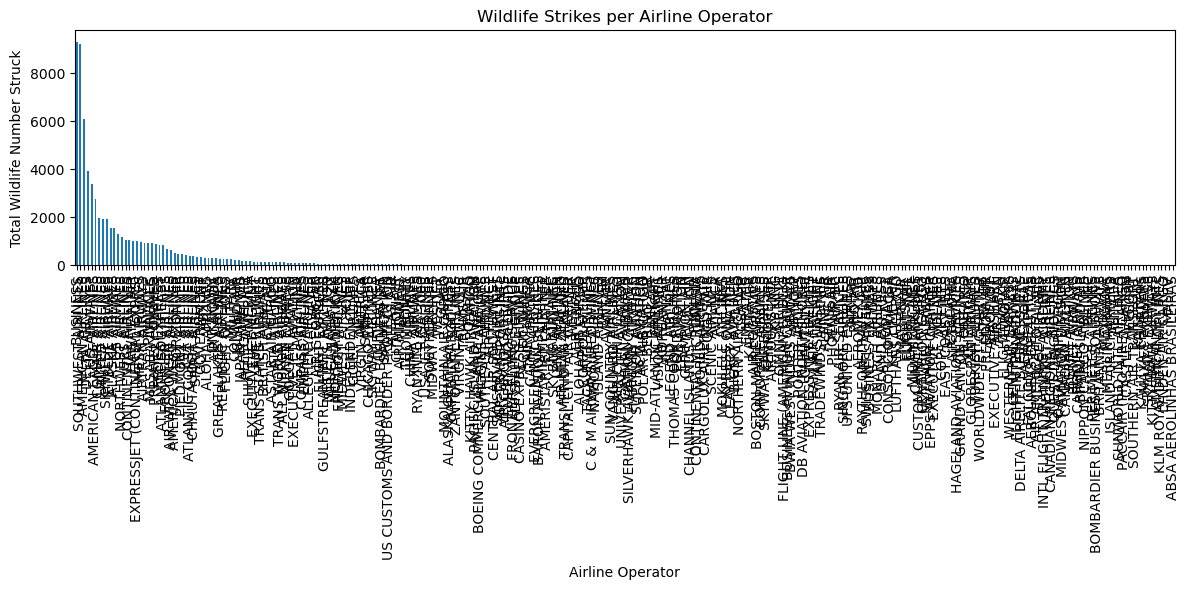

In [41]:
# Group by airline operator and sum the number of wildlife struck
operator_counts = df_org.groupby("aircraft_airline_operator")["wildlife_number_struck_actual"].sum().sort_values(ascending=False)

# Plot as a bar chart
plt.figure(figsize=(12,6))
operator_counts.plot(kind='bar')
plt.xlabel("Airline Operator")
plt.ylabel("Total Wildlife Number Struck")
plt.title("Wildlife Strikes per Airline Operator")
plt.tight_layout()
plt.show()

In [42]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25429 non-null  object 
 2   airport_name                             25429 non-null  object 
 3   altitude_bin                             25429 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25429 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  2078 non-null   object 
 8   flightdate                               25429 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25291

In [43]:
for label, content in df_org.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

record_id
wildlife_number_struck_actual
remains_of_wildlife_collected
remains_of_wildlife_sent_to_smithsonian
cost_total
feet_above_ground
number_of_people_injured


In [44]:
l=[]
for label ,content in df_org.items():
    if pd.api.types.is_object_dtype(content):
        l.append(label)
print(len(l))

19


### Converting string and object data to numbers

In [45]:
l=[]
for label, contents in df_org.items():
    if pd.api.types.is_object_dtype or pd.api.types.is_string_dtype:
        l.append(l)
print(len(l))

26


In [46]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25429 non-null  object 
 2   airport_name                             25429 non-null  object 
 3   altitude_bin                             25429 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25429 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  2078 non-null   object 
 8   flightdate                               25429 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25291

In [48]:
from pandas import CategoricalDtype
for label, content in df_org.items():
    if pd.api.types.is_object_dtype(content) or pd.api.types.is_string_dtype(content):
        df_org[label]=content.astype(CategoricalDtype(ordered=True))

In [49]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   record_id                                25558 non-null  int64   
 1   aircraft_type                            25429 non-null  category
 2   airport_name                             25429 non-null  category
 3   altitude_bin                             25429 non-null  category
 4   aircraft_make_model                      25558 non-null  category
 5   wildlife_number_struck                   25429 non-null  category
 6   wildlife_number_struck_actual            25558 non-null  int64   
 7   effect_impact_to_flight                  2078 non-null   category
 8   flightdate                               25429 non-null  category
 9   effect_indicated_damage                  25558 non-null  category
 10  aircraft_number_of_engines        

### now we have all numerical data
### we have to fill the missing values

In [73]:
len(df_org.isna().sum())

26

In [51]:
df_org.to_csv("data/birdstriketemp.csv", index=False)

In [52]:
# Importing the dataset again
df_temp=pd.read_csv("data/birdstriketemp.csv",low_memory=False)
df_temp.head(20)

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,...,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25T00:00:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14T00:00:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05T00:00:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23T00:00:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False
5,218432,Airplane,GUAYAQUIL/S BOLIVAR,< 1000 ft,A-300,Over 100,537,NaN,2003-07-24T00:00:00,No damage,...,False,NO DMG. BIRD REMAINS ON F/O WINDSCREEN.,Small,No Cloud,Unknown bird - small,False,0,0.0,0,False
6,221697,Airplane,NEW CASTLE COUNTY,< 1000 ft,LEARJET-25,Over 100,227,Other,2003-08-17T00:00:00,Caused damage,...,True,NaN,Small,No Cloud,European starling,False,1481711,150.0,0,False
7,236635,Airplane,WASHINGTON DULLES INTL ARPT,< 1000 ft,A-320,Over 100,320,Other,2006-03-01T00:00:00,Caused damage,...,False,WS ASSISTED IN CLEAN-UP OF 273 STARLINGS AND 1...,Small,Some Cloud,European starling,True,1483141,100.0,0,False
8,207369,Airplane,ATLANTA INTL,< 1000 ft,DC-9-30,2 to 10,9,Aborted Take-off,2000-01-06T00:00:00,No damage,...,False,NaN,Small,Some Cloud,Rock pigeon,False,0,0.0,0,False
9,204371,Airplane,ORLANDO SANFORD INTL AIRPORT,< 1000 ft,A-330,2 to 10,4,NaN,2000-01-07T00:00:00,No damage,...,False,FLT 057,Small,Some Cloud,Unknown bird - small,False,0,0.0,0,False


## Fill the missing values

### Filling the numerical values first

In [53]:
for label, contents in df_temp.items():
    if pd.api.types.is_numeric_dtype(contents):
        print(label)

record_id
wildlife_number_struck_actual
remains_of_wildlife_collected
remains_of_wildlife_sent_to_smithsonian
cost_total
feet_above_ground
number_of_people_injured


In [59]:
df_temp["wildlife_number_struck_actual"]

0        859
1        424
2        261
3        806
4        942
        ... 
25553      1
25554      1
25555      1
25556      1
25557      1
Name: wildlife_number_struck_actual, Length: 25558, dtype: int64

In [60]:
# check for which numeric column have null values
for label, contents in df_temp.items():
    if pd.api.types.is_numeric_dtype(contents):
        if pd.isnull(contents).sum():
            print(label)

feet_above_ground


In [65]:
df_temp["feet_above_ground"]

0        1500.0
1           0.0
2          50.0
3          50.0
4          50.0
          ...  
25553    1500.0
25554       0.0
25555       NaN
25556       0.0
25557       0.0
Name: feet_above_ground, Length: 25558, dtype: float64

In [66]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Adding a binary column toindicate its true or false
            df_temp[label+"_is_missing"]=pd.isnull(content)
            # Filling the median values in the blank cell
            df_temp[label]=content.fillna(content.median())

In [67]:
# checking if we have any other null values left
for label,conent in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [68]:
df_temp["feet_above_ground"]

0        1500.0
1           0.0
2          50.0
3          50.0
4          50.0
          ...  
25553    1500.0
25554       0.0
25555      50.0
25556       0.0
25557       0.0
Name: feet_above_ground, Length: 25558, dtype: float64

### Filling the missing categorical values

In [74]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

aircraft_type
airport_name
altitude_bin
aircraft_make_model
wildlife_number_struck
effect_impact_to_flight
flightdate
effect_indicated_damage
aircraft_number_of_engines
aircraft_airline_operator
origin_state
when_phase_of_flight
conditions_precipitation
remarks
wildlife_size
conditions_sky
wildlife_species
pilot_warned_of_birds_or_wildlife
is_aircraft_large


In [77]:
pd.Categorical(df_temp["aircraft_make_model"]).codes

array([ 39, 277, 129, ..., 196,  51,  39], shape=(25558,), dtype=int16)

In [78]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Adding the binary column for missing value
        df_temp[label+"_is_missing"]=pd.isnull(content)
        # Filling the missing values with categorical codes
        df_temp[label]=pd.Categorical(content).codes + 1

In [79]:
pd.Categorical(df_temp["aircraft_make_model"]).dtype

CategoricalDtype(categories=[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
                  ...
                  342, 343, 344, 345, 346, 347, 348, 349, 350, 351],
, ordered=False, categories_dtype=int16)

In [80]:
df_temp.head().T

,0,1,2,3,4
record_id,202152,208159,207601,215953,219878
aircraft_type,1,1,1,1,1
airport_name,531,209,538,912,715
altitude_bin,2,1,1,1,1
aircraft_make_model,40,278,130,40,153
wildlife_number_struck,4,4,4,4,4
wildlife_number_struck_actual,859,424,261,806,942
effect_impact_to_flight,2,0,0,4,0
flightdate,311,529,578,909,1180
effect_indicated_damage,1,1,2,2,2


In [81]:
df_temp["aircraft_make_model"].value_counts()

aircraft_make_model
43     2488
39     2309
153    1951
7      1193
6      1000
       ... 
194       1
210       1
347       1
340       1
166       1
Name: count, Length: 351, dtype: int64

In [82]:
df_temp.isna().sum()

record_id                                       0
aircraft_type                                   0
airport_name                                    0
altitude_bin                                    0
aircraft_make_model                             0
wildlife_number_struck                          0
wildlife_number_struck_actual                   0
effect_impact_to_flight                         0
flightdate                                      0
effect_indicated_damage                         0
aircraft_number_of_engines                      0
aircraft_airline_operator                       0
origin_state                                    0
when_phase_of_flight                            0
conditions_precipitation                        0
remains_of_wildlife_collected                   0
remains_of_wildlife_sent_to_smithsonian         0
remarks                                         0
wildlife_size                                   0
conditions_sky                                  0


## now that all the converted into numbers, we will base train a model

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

np.random.seed(42)
arr=[]

X=df_temp.drop("wildlife_number_struck_actual",axis=1)
y=df_temp["wildlife_number_struck_actual"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

model1=RandomForestRegressor(n_jobs=-1)
model2=LinearRegression(n_jobs=-1)
model3=LogisticRegression(n_jobs=-1)

model1.fit(X_train,y_train)
score1=model1.score(X_test,y_test)

model2.fit(X_train,y_train)
score2=model2.score(X_test,y_test)

model3.fit(X_train,y_train)
score3=model3.score(X_test,y_test)
arr.extend([score1,score2,score3])
arr

[0.8545823561966301, 0.10685048040171907, 0.8139671361502347]

### since we got best score from randomforestregressor, we are going to use it

### hyper-tuning RandomForestRegressor

In [97]:
hyperparams_dic={"n_estimators":np.arange(10,100,10),
                 "max_depth":[None,3,5,10],
                 "min_samples_leaf":[1,3,5],
                 "min_samples_split":np.arange(2,20,2),
                 "max_features":[0.5,1,"sqrt"]}

res_reg=RandomForestRegressor(n_jobs=-1,random_state=42)

X=df_temp.drop("wildlife_number_struck_actual",axis=1)
y=df_temp["wildlife_number_struck_actual"]

grid_seach=GridSearchCV(estimator=res_reg,param_grid=hyperparams_dic,cv=5,verbose=True,scoring="r2")
grid_seach.fit(X_train,y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 3, ...], 'max_features': [0.5, 1, ...], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': array([ 2, 4..., 14, 16, 18]), ...}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(40)


In [98]:
grid_seach.best_params_

{'max_depth': 10,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': np.int64(14),
 'n_estimators': np.int64(40)}

In [ ]:
# tuned_reg=RandomForestRegressor(max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
tuned_reg=RandomForestRegressor(n_jobs=-1)
tuned_reg.fit(X_train,y_train)
tuned_reg.score(X_test,y_test)

0.8543131237331433

In [102]:
tuned_reg=RandomForestRegressor(max_depth=10,max_features=0.5,min_samples_leaf=1,min_samples_split=14,n_estimators=1000,random_state=42)
# tuned_reg=RandomForestRegressor(n_jobs=-1)
tuned_reg.fit(X_train,y_train)
tuned_reg.score(X_test,y_test)

0.8432955715752346